<a href="https://colab.research.google.com/github/pearllpatell/is_4487_Patel/blob/main/lab6_retailer_eda_patel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [20]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [ ]:
df = pd.read_csv ('superstore_retail_orders.csv')

print(df)

       order_id order_date order_year_month     customer_name  \
0         51188     7/1/21          2021-07     Audrey Blanco   
1         51187     7/1/21          2021-07       Isaac Allen   
2         51199     7/2/21          2021-07        Ian Morgan   
3         51241     7/4/21          2021-07        Alexa Bell   
4         51297     7/8/21          2021-07        Casey Diaz   
...         ...        ...              ...               ...   
56040     74084    6/29/22          2022-06        Ian Rogers   
56041     74062    6/29/22          2022-06   Marcus Anderson   
56042     74065    6/29/22          2022-06  Nathaniel Howard   
56043     74038    6/29/22          2022-06        Robin Sanz   
56044     74110    6/30/22          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA                   4.0   
2              Dylanberg

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [ ]:
df['Total_Amount'] = df['quantity'] * df['product_price']

df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'], errors='coerce')

df_cleaned = df.dropna()

print(df_cleaned.head())


   order_id order_date order_year_month  customer_name               city  \
0     51188     7/1/21          2021-07  Audrey Blanco  North Cherylmouth   
1     51187     7/1/21          2021-07    Isaac Allen         Traceyland   
2     51199     7/2/21          2021-07     Ian Morgan          Dylanberg   
3     51241     7/4/21          2021-07     Alexa Bell     Lake Tracytown   
4     51297     7/8/21          2021-07     Casey Diaz        Byrdchester   

              state_province  quantity  \
0  NEW HAMPSHIRE                   3.0   
1  WEST VIRGINIA                   4.0   
2  SOUTH DAKOTA                    5.0   
3  WISCONSIN                       1.0   
4  MISSISSIPPI                     1.0   

                                        product_name product_line  \
0  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
1  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
2  Apple iPhone XR (Yellow, 256 GB) (Includes Ear...       Mobile   
3  Apple

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

In [ ]:
#bar chart

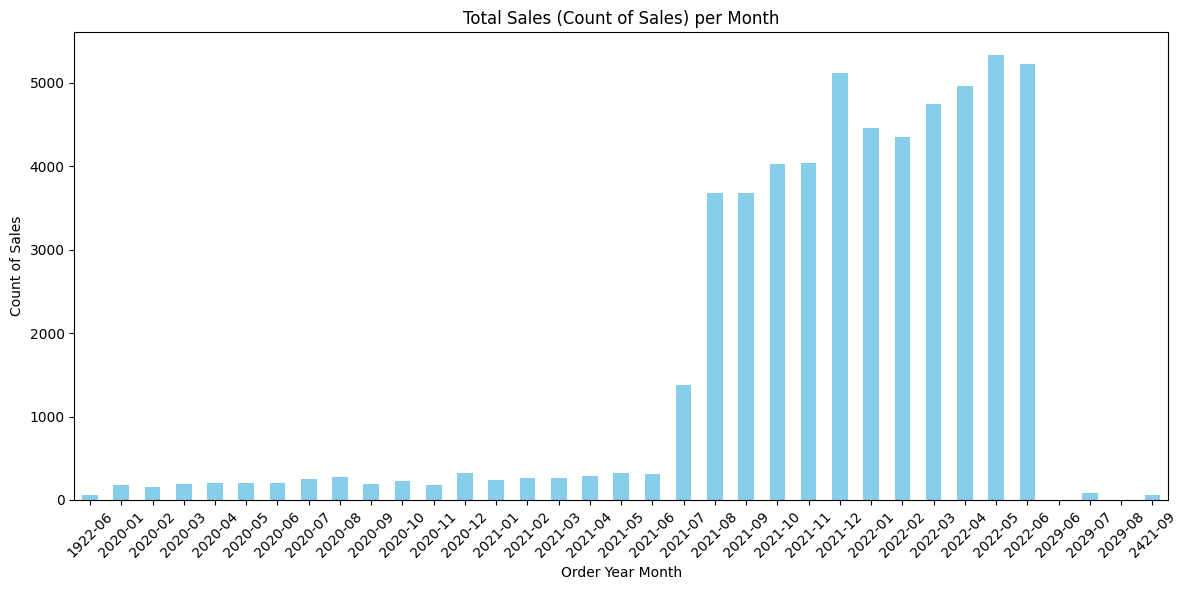

In [ ]:
# Count sales per order_year_month
sales_per_month = df_cleaned.groupby('order_year_month').size()

plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='bar', color='skyblue')
plt.title('Total Sales (Count of Sales) per Month')
plt.xlabel('Order Year Month')
plt.ylabel('Count of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#histogram

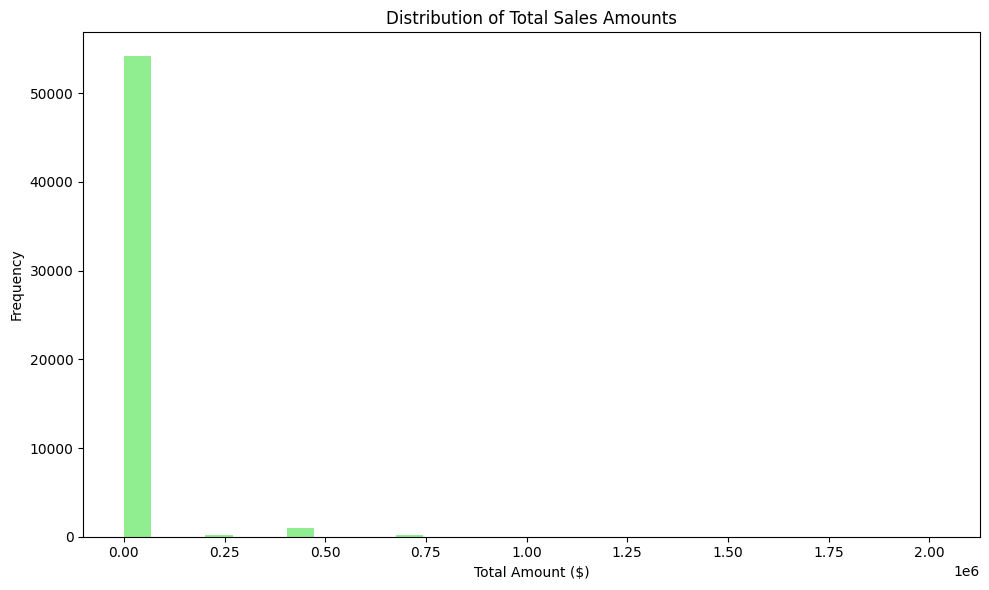

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Total_Amount'], bins=30, color='lightgreen')
plt.title('Distribution of Total Sales Amounts')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#box plot

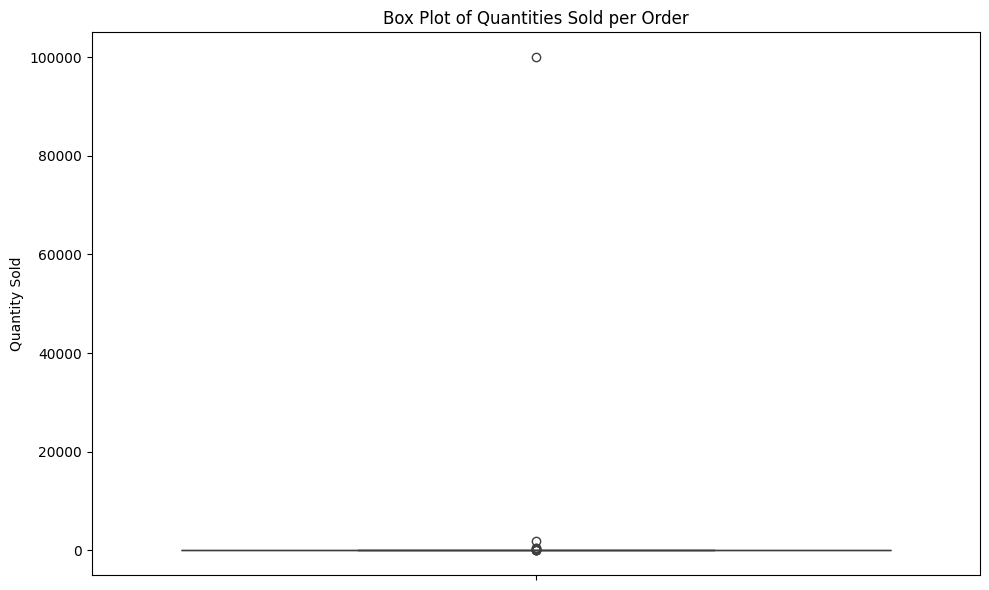

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='quantity', data=df_cleaned)
plt.title('Box Plot of Quantities Sold per Order')
plt.ylabel('Quantity Sold')
plt.tight_layout()
plt.show()

In [ ]:
#scatter plot

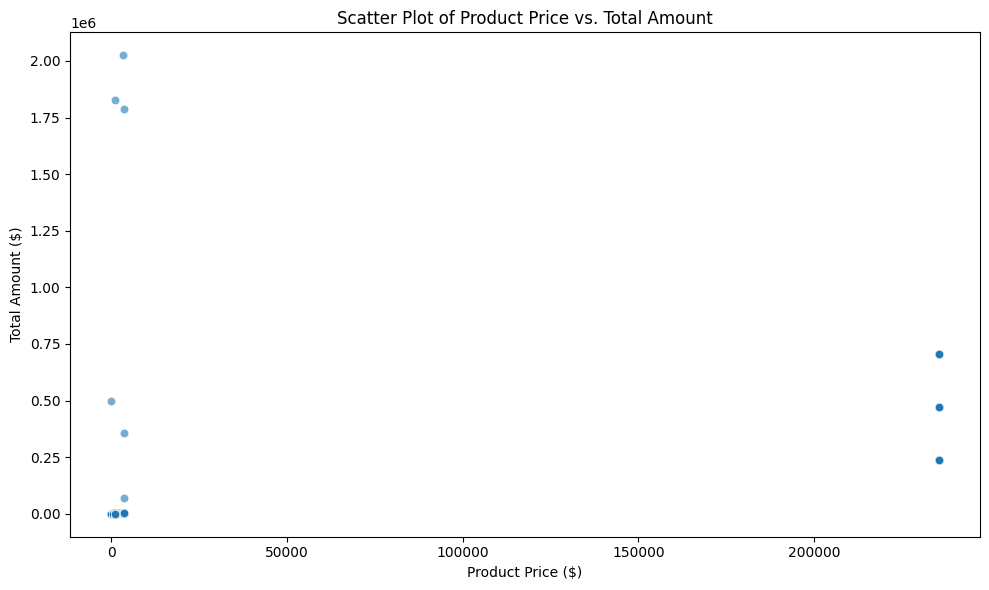

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_price', y='Total_Amount', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot of Product Price vs. Total Amount')
plt.xlabel('Product Price ($)')
plt.ylabel('Total Amount ($)')
plt.tight_layout()
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

In [ ]:
#month of year

In [ ]:
sales_by_month = df_cleaned.groupby('order_year_month').size()
print("Sales by Month:\n", sales_by_month)

Sales by Month:
 order_year_month
1922-06      59
2020-01     184
2020-02     156
2020-03     197
2020-04     204
2020-05     206
2020-06     203
2020-07     247
2020-08     276
2020-09     192
2020-10     223
2020-11     182
2020-12     322
2021-01     242
2021-02     260
2021-03     265
2021-04     289
2021-05     326
2021-06     310
2021-07    1382
2021-08    3684
2021-09    3685
2021-10    4023
2021-11    4040
2021-12    5112
2022-01    4461
2022-02    4353
2022-03    4751
2022-04    4957
2022-05    5338
2022-06    5226
2029-06       2
2029-07      85
2029-08       3
2421-09      55
dtype: int64


In [ ]:
#sales by state

In [ ]:
sales_by_state = df_cleaned.groupby('state_province').size().sort_values(ascending=False)
print("\nSales by State:\n", sales_by_state.head())  # Top 5 states


Sales by State:
 state_province
ARIZONA                      1353
UTAH                         1213
MISSISSIPPI                  1198
MAINE                        1176
NORTH CAROLINA               1174
dtype: int64


In [ ]:
#sales by product

In [ ]:
sales_by_product = df_cleaned.groupby('product_name').size().sort_values()
print("\nWorst Products for Sales:\n", sales_by_product.head())
print("\nBest Products for Sales:\n", sales_by_product.tail())


Worst Products for Sales:
 product_name
Projector Silver, 48    22
Projector Silver, 44    24
Projector Silver, 42    25
Projector Black, 38     25
Projector Black, 42     26
dtype: int64

Best Products for Sales:
 product_name
Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers    2081
Inventis 5V 1.2W Portable Flexible USB LED Light Lamp                                                          2152
GIZGA essentials Universal Silicone Keyboard Protector Skin                                                    2838
E-COSMOS 5V 1.2W Portable Flexible USB LED Light                                                               2928
Water Bottle - 30 oz.                                                                                          3937
dtype: int64


## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

In [ ]:
#pair plot

<ipython-input-21-8b4dae8f8ea0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Sales_Category'] = pd.qcut(df_cleaned['Total_Amount'],


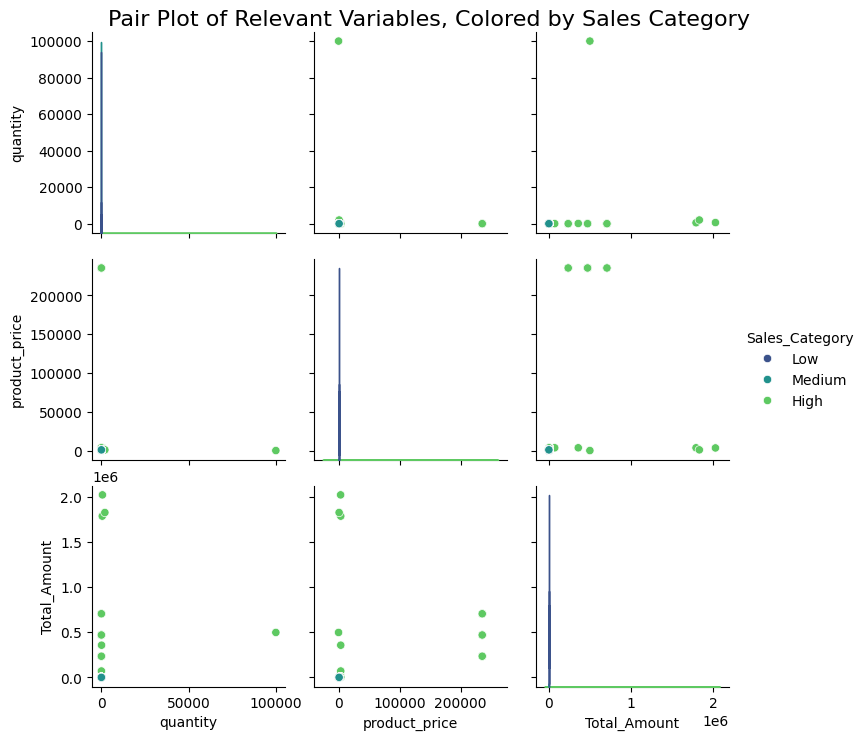

In [21]:
# Categorize Total_Amount into 'Low', 'Medium', 'High' based on quantiles
df_cleaned['Sales_Category'] = pd.qcut(df_cleaned['Total_Amount'],
                                        q=[0, .33, .66, 1],
                                        labels=['Low', 'Medium', 'High'])

# Select relevant variables for the pair plot
# Adjust this list based on the variables you're interested in
variables = ['quantity', 'product_price', 'Total_Amount']

# Create a pair plot
sns.pairplot(df_cleaned, vars=variables, hue='Sales_Category', palette='viridis', diag_kind='kde')

# Enhance plot aesthetics
plt.suptitle('Pair Plot of Relevant Variables, Colored by Sales Category', size=16)
plt.subplots_adjust(top=0.95)  # Adjust title position

# Show plot
plt.show()
